# Data_for_Dating_site Task 1: Is there a correlation between user's location (rural or urban) and their age?
### Once we have our data, we need to determine the necessary one and in this case it is the  correlation between location and their age.


In [1]:
# Necessary data is determined by:
# 1. First we need to determine what data could disaprove our hypothesis (for instance, age affects dating patterns)
# 2. Second, we find out how much data to collect. Whole population is ideal but impractical so we need to choose a sample set of data.
# According to the Sample size calculator online, information like margin of error (in my case 5% as larger the error, the less confidence we should have), confidence level (95%), population size and Likely sample proportion (50%)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Import the CSV files and create the DataFrames:
user_data = pd.read_csv("user_data.csv")

In [13]:
us_cities_small = pd.read_csv("us_cities_small.csv")

In [12]:
print(user_data.head(15))

              city        education  age
0     Brooklyn, NY          college   31
1     Brooklyn, NY  graduate degree   31
2     Brooklyn, NY  graduate degree   32
3     Brooklyn, NY          college   37
4     Brooklyn, NY          college   21
5       Austin, TX          college   25
6      Oakland, CA  graduate degree   29
7   Pittsburgh, PA          college   29
8   Pittsburgh, PA          college   27
9   Pittsburgh, PA  graduate degree   28
10        Ames, IA          college   31
11      Albany, NY  graduate degree   31
12   Lancaster, PA          college   31
13        Reno, NV      high school   31
14     Houston, TX      high school   31


In [14]:
new_df = pd.merge(user_data, us_cities_small)

In [15]:
print(new_df.head(15))

              city        education  age  population_proper
0     Brooklyn, NY          college   31          2629150.0
1     Brooklyn, NY  graduate degree   31          2629150.0
2     Brooklyn, NY  graduate degree   32          2629150.0
3     Brooklyn, NY          college   37          2629150.0
4     Brooklyn, NY          college   21          2629150.0
5       Austin, TX          college   25           947890.0
6       Austin, TX  graduate degree   22           947890.0
7      Oakland, CA  graduate degree   29           420005.0
8   Pittsburgh, PA          college   29           303625.0
9   Pittsburgh, PA          college   27           303625.0
10  Pittsburgh, PA  graduate degree   28           303625.0
11  Pittsburgh, PA  graduate degree   36           303625.0
12        Ames, IA          college   31            66191.0
13      Albany, NY  graduate degree   31            98111.0
14   Lancaster, PA          college   31            59218.0


In [16]:
new_df.loc[new_df.population_proper < 100000, "location"]="rural"

In [17]:
new_df.loc[new_df.population_proper >= 100000, "location"] = "urban"

In [18]:
print(new_df.head(15))

              city        education  age  population_proper location
0     Brooklyn, NY          college   31          2629150.0    urban
1     Brooklyn, NY  graduate degree   31          2629150.0    urban
2     Brooklyn, NY  graduate degree   32          2629150.0    urban
3     Brooklyn, NY          college   37          2629150.0    urban
4     Brooklyn, NY          college   21          2629150.0    urban
5       Austin, TX          college   25           947890.0    urban
6       Austin, TX  graduate degree   22           947890.0    urban
7      Oakland, CA  graduate degree   29           420005.0    urban
8   Pittsburgh, PA          college   29           303625.0    urban
9   Pittsburgh, PA          college   27           303625.0    urban
10  Pittsburgh, PA  graduate degree   28           303625.0    urban
11  Pittsburgh, PA  graduate degree   36           303625.0    urban
12        Ames, IA          college   31            66191.0    rural
13      Albany, NY  graduate degre

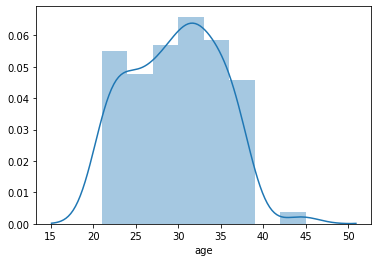

In [19]:
age = new_df["age"]
sns.distplot(age)

In [20]:
plt.show()
# From the graph, we can incur that the dataset is not evenly distributed as there are highest number of instances in 30-35 age range.This histogram shows the relative amounts of people with each age. 

In [21]:
location_mean_age = new_df.groupby("location").age.mean()

In [22]:
print(location_mean_age)

location
rural    31.142857
urban    29.609195
Name: age, dtype: float64


In [23]:
# average age of a user is younger in urban than on a rural setting.

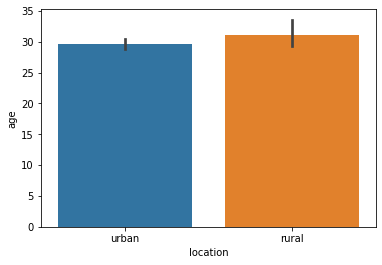

In [24]:
plt.close()
sns.barplot(
    data=new_df,
    x= "location",
    y= "age"
)
plt.show()